In [1]:
%pip install tensorflow

     |████████████████████████████████| 199.0 MB 5.5 kB/s 
     |████████████████████████████████| 2.9 MB 752 kB/s 
     |████████████████████████████████| 42 kB 229 kB/s 
     |████████████████████████████████| 3.9 MB 45 kB/s 
     |████████████████████████████████| 57 kB 241 kB/s 
     |████████████████████████████████| 5.6 MB 12 kB/s 
     |████████████████████████████████| 15.6 MB 485 kB/s 
     |████████████████████████████████| 1.3 MB 621 kB/s 
     |████████████████████████████████| 65 kB 295 kB/s 
     |████████████████████████████████| 462 kB 657 kB/s 
     |████████████████████████████████| 132 kB 54 kB/s 
     |████████████████████████████████| 62 kB 125 kB/s 
     |████████████████████████████████| 152 kB 115 kB/s 
     |████████████████████████████████| 781 kB 459 kB/s 
     |████████████████████████████████| 97 kB 250 kB/s 
     |████████████████████████████████| 3.5 MB 934 kB/s 
     |████████████████████████████████| 155 kB 206 kB/s 
     |██████████████████████████████

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

In [4]:
df = pd.read_csv("../DATA/fake_reg.csv")
df.head(5)

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [5]:
# based off feature1 and feature2 attempt to predict the price


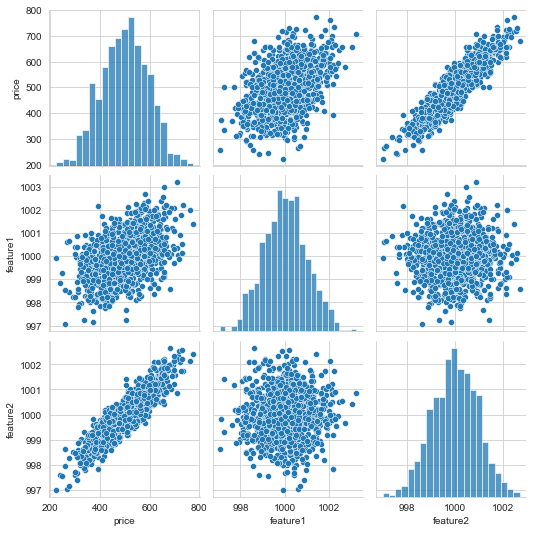

In [6]:
sns.pairplot(data=df)

In [7]:
# create a test train split
from sklearn.model_selection import train_test_split

In [8]:
x = df[["feature1", "feature2"]].values   
y = df["price"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
x

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [10]:
y

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

In [11]:
x_test.shape

(200, 2)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
# how to scale the data
scaler = MinMaxScaler()

In [14]:
scaler.fit(x_train) # calculates the parameters it needs to do the actual scaling later on

MinMaxScaler()

In [15]:
x_train = scaler.transform(x_train)

In [16]:
x_test = scaler.transform(x_test)

In [17]:
x_train.min()

0.0

In [18]:
x_test.min()

0.0905961350750033

In [19]:
# start creating the neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [20]:
help(Sequential)

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  >>> # Optionally, the first layer can receive an `input_shape` argument:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  >>> # Afterwards, we do automatic shape inference:
 |  >>> model.add(tf.keras.layers.Dense(4))
 |  
 |  >>> # This is identical to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.Input(shape=(16,)))
 |  >>> model.add(tf.keras.layers.Dense(8))
 |  
 |  >>> # Note that you can also omit the `input_shape` argument.
 |  >>> # In that case the model doesn't have any weights until the first call
 |  >>> # to a training/evaluation method (since it isn't yet buil

In [21]:
help(Dense)

Help on class Dense in module keras.layers.core:

class Dense(keras.engine.base_layer.Layer)
 |  Dense(*args, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).
 |  For example, if input has dimensions `(batch_size, d0, d1)`,
 |  then we create a `kernel` with shape `(d1, units)`, and the `kernel` operates
 |  along axis 2 of the `input`, on every sub-t

In [22]:
# relu: rectifier linear unit
# first way to do this
# model = Sequential([Dense(4, activation="relu"),
#                     Dense(4, activation="relu"),
#                     Dense(1, activation="linear")
#                     ])


In [23]:
# second way to do this: create an empty sequential model and then use the add method to add layers
model = Sequential()

model.add(Dense(4, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="relu"))

# compile the model
model.compile(optimizer="rmsprop", loss="mse")

In [24]:
model.fit(x=x_train, y=y_train, epochs=300, verbose=0) # epochs: number of iterations 250=250 times

<AxesSubplot:>

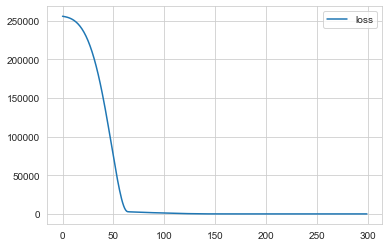

In [25]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [26]:
model.evaluate(x_test, y_test, verbose=0) # returns the metric loss

25.925277709960938

In [27]:
model.evaluate(x_train, y_train, verbose=0) # returns the metric loss

24.31549072265625

In [28]:
test_predictions = model.predict(x_test)

In [29]:
test_predictions = pd.Series(test_predictions.reshape(200,))

In [30]:
pred_df = pd.DataFrame(y_test, columns=["Test True Y"])

In [31]:
pred_df = pd.concat([pred_df, test_predictions], axis=1)

In [32]:
pred_df.head(5)

,Test True Y,0
0,402.296319,404.814423
1,624.156198,622.940552
2,582.455066,591.646362
3,578.588606,571.437500
4,371.224104,365.744781


In [33]:
pred_df.columns = ["Test True Y", "Model Predictions"]

In [34]:
pred_df

,Test True Y,Model Predictions
0,402.296319,404.814423
1,624.156198,622.940552
2,582.455066,591.646362
3,578.588606,571.437500
4,371.224104,365.744781
...,...,...
195,645.708440,644.678772
196,522.358884,527.327087
197,338.133842,336.782990
198,497.464727,492.143158


<AxesSubplot:xlabel='Test True Y', ylabel='Model Predictions'>

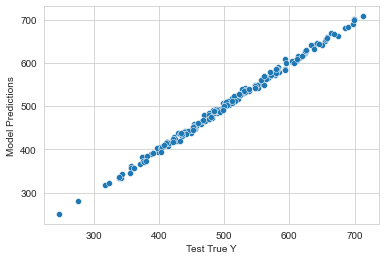

In [35]:
sns.scatterplot(x="Test True Y", y="Model Predictions", data=pred_df)

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [37]:
mean_absolute_error(pred_df["Test True Y"], pred_df["Model Predictions"])

4.048163310781381

In [38]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [39]:
pred_df['Error'] = pred_df['Test True Y'] - pred_df['Model Predictions']

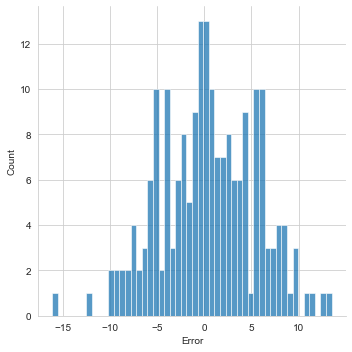

In [40]:
sns.displot(pred_df['Error'], bins=50)